## 4-1 들어가며
딥러닝 모델을 학습 시키기 위해서는 대량의 데이터를 확보해야 한다. 대표적인 이미지 데이터셋인 이미지넷(ImageNet)은 약 1,400만 장의 이미지를 갖고 있고, 분류 대상 클래스가 10개라 상대적으로 간단해 보이는 CIFAR-10도 몇 만 장의 데이터를 가지고 있다.
미리 공개되어 있는 데이터셋 외에도 우리가 원하는 문제를 풀 때는 이에 맞는 데이터가 추가로 필요한다. 하지만 이러한 데이터를 몇 만 장씩 구축하는 데는 많은 비용과 시간이 필요하다. 이때, 제한된 데이터셋을 최대한 활용하기 위해서 augmentation이라는 방법을 사용할 수 있다. 그렇다면 augmentation은 어떻게 사용하는 것이며 우리에게 어떤 효과를 줄 수 있을까?

In [ ]:
mkdir -p ~/aiffel/data_augmentation/images

## 4-2 데이터셋의 현실
### 1) 대량의 데이터
앞서 이야기했듯, 이미지넷은 1,400만 장의 이미지를 보유하고 있으며, 우리가 자주 사용하는 CIFAR-10만 하더라도 학습용 데이터셋은 5만 장이나 된다.
이런 규모의 데이터셋을 만드는 데 얼마나 큰 비용이 들까? 라벨 데이터를 포함해 장당 10원에 불과하다고 하더라도 이미지넷과 같은 데이터셋을 구축하기 위에서는 1억이 넘는 비용이 들어간다. 물론 실제로 이러한 데이터셋을 직접 구축하려면 이보다 훨씬 비싼 가격이 들어간다.
<br>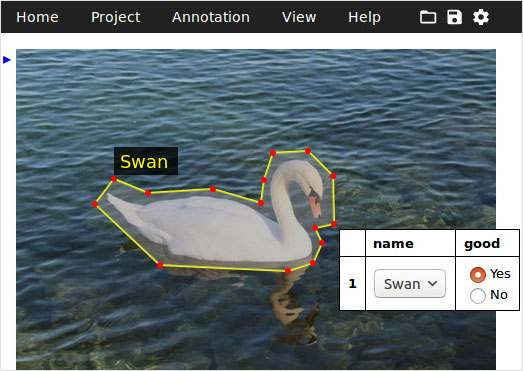<br>

### 2) 직접 구축하는 데이터셋
사진을 보고 시내의 유명한 카페를 분류하는 모델을 만들어야 하는 프로젝트가 생겼습니다. 그러면 우리는 어떻게 데이터셋을 모을 수 있을까?
강남의 카페를 조사하기 위해서 인스타그램(Instagram)을 크롤링 해 20여 개 카페의 사진 약 2,500장을 얻을 수 있었다고 상상해 보자. 처음 크롤링 할 때는 많았으나 내부 인테리어 사진으로 카페를 구분하기 위해서 음식 사진, 사람 사진을 제외하고 나니 많은 수가 줄어들었다. 이처럼 직접 데이터를 수집한다면 만 장 단위로 데이터셋을 모으기가 쉽지 않다는 것을 알 수 있다.
<br>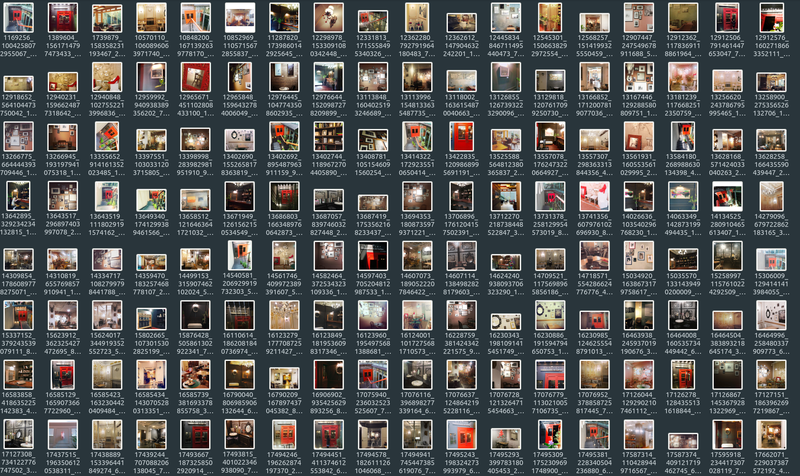

<b>Q. 데이터셋 구축 프로세스를 찾아보고 정리해봅시다.</b>
<br>A)데이터 수집
<br>데이터 전처리
<br>주석 및 라벨링
<br>데이터 품질 검증


## 4-3 Data Augmentation이란? (1)개요
그렇다면 어떻게 해야 할까요? 열심히 모은 데이터셋을 최대한 활용할 수 있는 방법은 없을까?
Data augmentation은 갖고 있는 데이터셋을 여러 가지 방법으로 증강시켜(augment) 실질적인 학습 데이터셋의 규모를 키울 수 있는 방법이다. 일반적으로 하드디스크에 저장된 이미지 데이터를 메모리에 로드한 후, 학습시킬 때 변형을 가하는 방법을 사용하다. 이를 통해 1장의 이미지를 더 다양하게 쓸 수 있게 되겠죠.
아래 비디오를 보고 data augmentation의 개념을 익혀 보자.
<br>https://youtu.be/JI8saFjK84o<br>
데이터가 많아진다는 것은 과적합(overfitting)을 줄일 수 있다는 것을 의미한다. 또한 우리가 가지고 있는 데이터셋이 실제 상황에서의 입력값과 다를 경우, augmentation을 통해서 실제 입력값과 비슷한 데이터 분포를 만들어 낼 수 있다. 예를 들어, 우리가 학습한 데이터는 노이즈가 많이 없는 사진이지만 테스트 이미지는 다양한 노이즈가 있는 경우 테스트에서 좋은 성능을 내기 위해서는 이러한 노이즈의 분포를 예측하고 학습 데이터에 노이즈를 삽입해 모델이 이런 노이즈에 잘 대응할 수 있도록 해야 한다. 이렇게 data augmentation은 데이터를 늘릴 뿐만 아니라 모델이 실제 테스트 환경에서 잘 동작할 수 있도록 도와주기도 한다.

#### 이미지 데이터 augmentation
이미지 데이터의 augmentation은 포토샵, SNS의 사진 필터, 각종 카메라 앱에서 흔히 발견할 수 있는 기능들과 비슷하다. 쉬운 예로는 모델이 다양한 색상의 사진을 학습하게 하기 위해서 우리가 인스타그램에 업로드할 때 쓰는 색상 필터들을 적용해 볼 수 있다. 또 좌우 대칭이나 상하 반전과 같이 이미지의 공간적 배치를 조작할 수도 있다.
<br><br><b>Q. Data Augmentation의 장점은 Overfitting을 막는 장점이 있습니다. 그렇다면 Augmentation의 특징과 장단점을 찾아보고 정리해봅시다.</b>
<br> A)오버피팅을 막고 예측 범위를 넓혀준다, 불필요한 데이터가 생길 수 있다.


## 4-4. Data Augmentation이란? (2)다양한 Image Augmentation방법
그렇다면 image augmentation 기법에는 구체적으로 어떤 것들이 있는지 살펴보자. 먼저 텐서플로우 튜토리얼에 소개된 image augmentation 예제들로부터 시작하겠다. 아래 텐서플로우 페이지에서는 텐서플로우 API를 사용해 바로 적용할 수 있는 image augmentation 기법들을 소개하고 있다.
- Tensorflow: Data Augmentation (https://www.tensorflow.org/tutorials/images/data_augmentation?hl=ko)

Flipping
Flip은 이미지를 대칭하는 기능이다. 우리가 거울을 보면 반전이 되듯이 좌우 또는 상하로 이미지를 반전시키는 방법입니다. 분류 문제에서는 문제가 없을 수 있지만 물체 탐지(detection), 세그멘테이션(segmentation) 문제 등 정확한 정답 영역이 존재하는 문제에 적용할 때에는 라벨도 같이 좌우 반전을 해주어야 한다.
만약 숫자나 알파벳 문자를 인식(recognition)하는 문제에 적용할 때도 주의해야 할 것이다. 상하나 좌우가 반정될 경우 다른 글자가 될 가능성이 있으니까.
<br>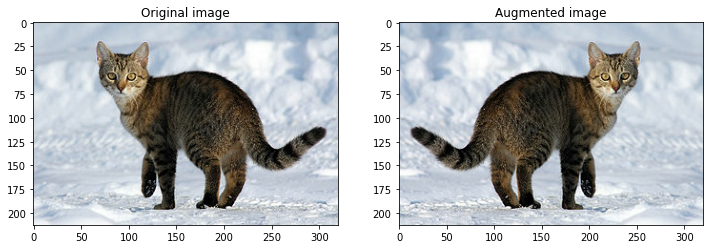

Gray Scale
Gray scale은 3가지 채널(channel)을 가진 RGB 이미지를 하나의 채널을 가지도록 해준다. 아래의 시각화 예제는 흑백 대신 다른 색상으로 이미지를 표현했다. 텐서플로우에서 어떻게 구현이 되었는지는 아래 코드를 확인해 주세요. RGB 각각의 채널마다 가중치(weight)를 주어 가중합(weighted sum)을 하였다. 사용된 가중치의 경우 합이 1이 됨을 알 수 있다.
<br>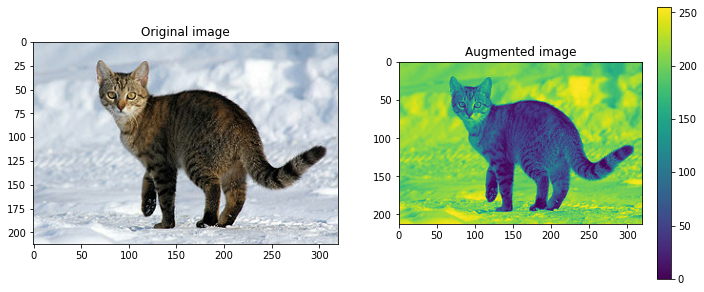

Saturation
Saturation은 RGB 이미지를 HSV(Hue(색조), Saturation(채도), Value(명도)의 3가지 성분으로 색을 표현) 이미지로 변경하고 S(saturation) 채널에 오프셋(offset)을 적용, 조금 더 이미지를 선명하게 만들어 준다. 이후 다시 우리가 사용하는 RGB 색상 모델로 변경을 해준다.
색상 모델(gray, RGB, HSV, YCBCr) 에 대해서 보통 이미지, 영상 관련 처리를 할 때 상황에 맞는 색상 모델을 정해야 한다. 이러한 색상 모델에는 여러 가지 종류가 있다. 간단하게 색상 모델에 대한 특징을 정리해보겠다.
<br>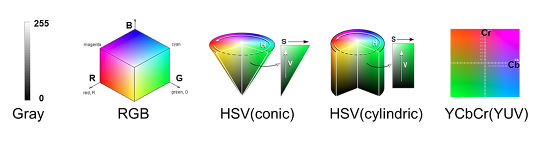

Gray 모델 - 색(Color) 정보를 사용하지 않고, 밝기 정보만으로 영상을 표현하는 것입니다.검정 (0) 부터 흰색 (255) 까지 총 256 단계의 밝기 값(Intensity)으로 영상 픽셀 값을 표현합니다.
<br>
RGB 모델 - 가장 기본적인 색상 모델로, 색(Color)을 Red, Green, Blue의 3가지 성분의 조합으로 생각하는 것을 말합니다. RGB 모델에서 검은색은 R = G = B = 0, 흰색은 R = G = B = 255, 빨간색은 R = 255, G = B = 0, 노란색은 R = G = 255, B = 0으로 표현합니다. R = G = B 인 경우는 무채색인 Gray 색상이 됩니다. R, G, B 각각은 0 ~ 255 사이의 값을 가질 수 있으므로, RGB 색상 모델을 사용하면 총 256 * 256 * 256 = 16,777,216 가지의 색을 표현할 수 있습니다. ex)(0, 0, 0) : 검정,(255, 255, 255) : 흰색,(255, 0, 0) : 빨강,(0, 255, 0) : 초록,(0, 0, 255) : 파랑
<br>
HSV 모델 - Hue(색조), Saturation(채도), Value(명도)의 3가지 성분으로 색을 표현합니다. Hue는 색조 ( 예 : 붉은색 계열인지 푸른색 계열인 지) 를 나타내고, Saturation은 그 색이 얼마나 선명한(순수한) 색인지, Value 는 밝기(Intensity)를 나타냅니다. HSV 모델은 우리가 색을 가장 직관적으로 표현할 수 있는 모델이고, 머리속에서 상상하는 색을 가장 쉽게 만들어낼 수 있는 모델입니다. 영상처리 / 이미지 처리 에서 HSV 모델을 사용할 때, H, S, V 각각은 0 ~ 255 사이의 값으로 표현됩니다. H 값은 색의 종류를 나타내기에 크기는 의미가 없으며 단순한 인덱스(Index)를 나타냅니다. S 값은 0이면 무채색 (gray 색), 255면 가장 선명한(순수한) 색임을 나타냅니다. V 값은 작을수록 어둡고, 클수록 밝은 색임을 나타냅니다. HSV 색상 모델은 그림과 같이 원뿔(conic) 형태, 원기둥(cylindric) 형태가 있습니다.
<br>
YCbCr 모델 - RGB 색에서 밝기 성분(Y)과 색차 정보(Cb, Cr)를 분리하여 표현하는 색상 모델입니다.디지털 영상에서 Y, Cb, Cr 은 각각 0 ~ 255 사이의 값을 가지며, Y가 커지면 그림이 전체적으로 밝아지고, Y가 작아지면 전체적으로 어두워집니다.YCbCr 모델은 mpeg에서 사용되는 색상모델로써, 인간의 눈이 밝기 차에는 민감하지만, 색차에는 상대적으로 둔감하다는 점을 이용해서 Y에서 많은 비트 수(해상도)를 할당하고 Cb, Cr에는 낮은 비트 수를 할당하는 방식으로 비디오를 압축합니다. 따라서 비디오 데이터를 처리할 경우에 YCbCr 모델을 사용하면 별도의 색상 변환을 하지 않아도 되는 장점을 가지고 있습니다.또한, YCbCr 모델은 YUV 모델로도 불립니다.
<br>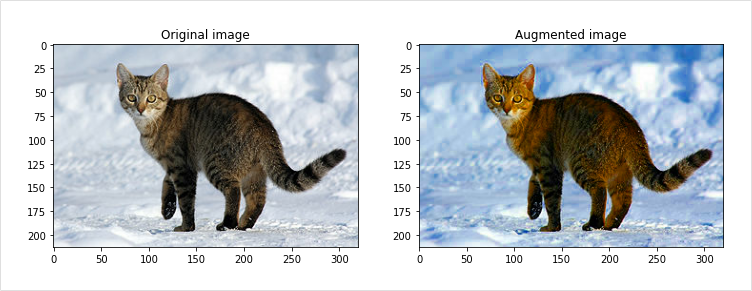

Brightness
밝기를 조절할 수도 있다. 우리가 주로 사용하는 RGB에서 (255,255,255)는 흰색을, (0,0,0)은 검은색을 의미한다. 따라서 이미지는 RGB 채널에서 값을 더해주면 밝아지고, 빼주면 어두워진다. 이를 통해서 Brightness를 변경할 수 있다.
<br>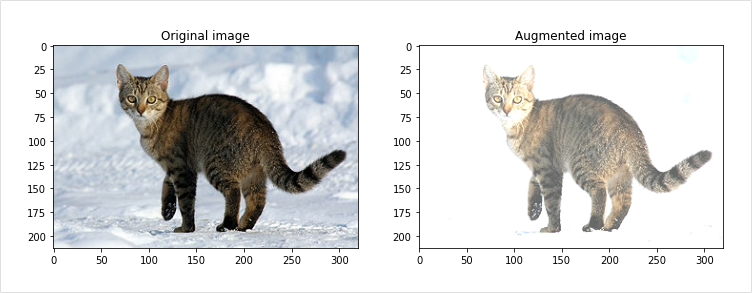<br>

Rotation
Rotation은 이미지의 각도를 변환해 준다. 90도의 경우 직사각형 형태가 유지되기 때문에 이미지의 크기만 조절해 주면 바로 사용할 수 있다. 하지만 90도 단위로 돌리지 않는 경우 직사각형 형태에서 기존 이미지로 채우지 못하는 영역을 어떻게 처리해야 할지 유의해야 한다.
<br>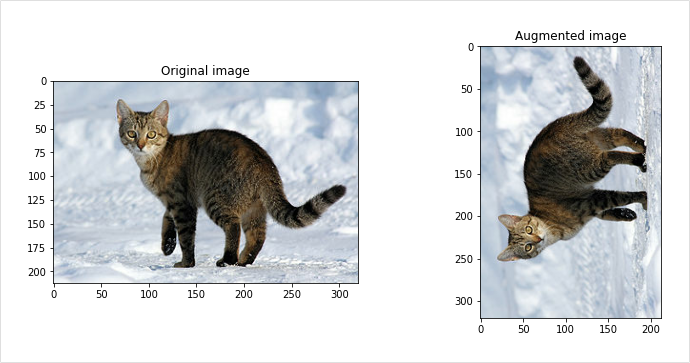<br>

Center Crop
Center crop은 이미지의 중앙을 기준으로 확대하는 방법이다. 너무 작게 center crop을 할 경우 본래 가진 라벨과 맞지 않게 되는 상황이 발생할 수 있으니 주의가 필요하다. 예를 들어 고양이 라벨의 이미지를 확대해 한 장 더 만들어내려면, 이미지 내에 고양이의 형상을 유지해야 하고 털만 보이는 이미지를 만들어서는 안 된다.
<br>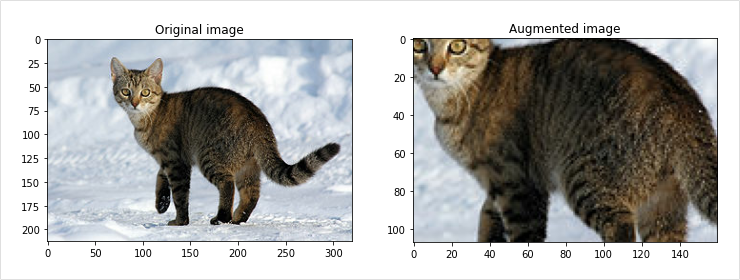

정리
위의 기본적인 방법들 외에도 다양한 augmentation 방법론이 있다. 이들 방법을 사용하면 아래 이미지처럼 라벨은 유지한 채 다양한 이미지를 학습 데이터로 사용할 수 있게 된다.
<br>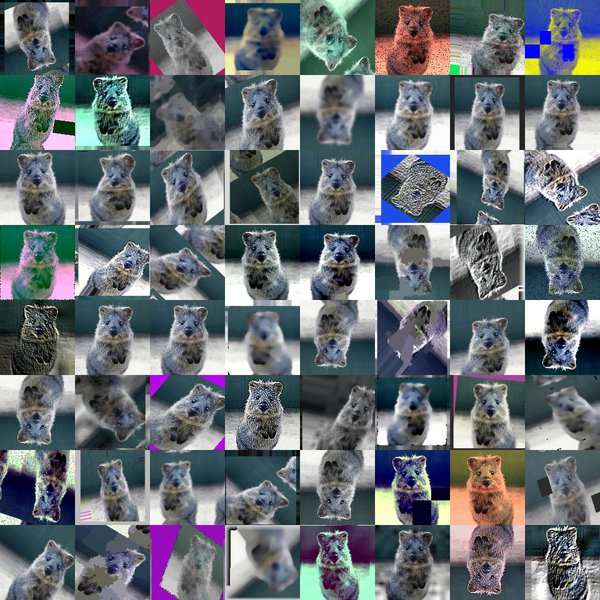<br>

<br><b>Q. 위 이미지는 원본 이미지에 다양한 augmentation을 적용한 것입니다. 여기 적용된 기법들 중 우리가 위에서 언급하지 않은 것에는 어떤 것들이 있을까요? 위 이미지의 출처에 명시된 기법들을 참고하여 답변해 봅시다.</b>
<br>A)Gaussian noise
<br>Contrast change
<br>Sharpen
<br>Affine transformation


위 이미지처럼 augmentation 방법은 다양합니다. 풀어야 하는 문제에 따라서 augmentation 코드는 직접 만들거나 새로운 라이브러리를 활용해야 할 수 있습니다. 다음 스텝에서는 텐서플로우의 라이브러리와 다른 image augmentation 전용 라이브러리를 활용하는 방법을 익혀보겠습니다.


## 4-5 텐서플로우를 사용한 Image Augmentation (1)Flip
### 준비하기
이제 위에서 봤던 방법들을 코드로 사용해 보겠습니다. 필요에 따라서 매개변수에 전달하는 값을 바꿔보고 데이터에 랜덤하게 적용해 보도록 하겠습니다. 이미지를 PIL로 로드하고 이를 텐서로 바꾼 뒤, 기법을 하나씩 적용해보고 이를 다시 이미지로 화면에 표시해서 결과를 확인하겠습니다.
아래 이미지를 다운로드할 필요는 없습니다. 이미 준비된 이미지를 연결해 주세요.

In [ ]:
$ ln -s ~/data/* ~/aiffel/data_augmentation/images/

In [ ]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_img_path = os.getenv('HOME')+'/aiffel/data_augmentation/images/mycat.jpg'
sample_img_path

이미지를 불러와 적절히 리사이징 해줍니다. 저는 500x400으로 크기를 조절해 주었습니다.

In [ ]:
image = Image.open(sample_img_path).resize((500, 400)) # 이미지에 따라 숫자를 바꾸어 보세요.
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

#### Flip 해보기
Flip을 적용해줍시다. Flip은 flip_left_right와 flip_up_down 두 가지로 좌우와 상하 반전으로 구분됩니다.

In [ ]:
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(12, 12))

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

plt.show()

위의 함수들은 일괄적으로 상하 또는 좌우 반전을 적용합니다. 우리는 이를 확률에 따라서 적용되도록 해야 합니다. 그래야 반전이 되지 않은 원본 데이터도 활용이 될 수 있기 때문이죠. 이를 위해서 활용할 수 있는 것이 random_flip_left_right와 random_flip_up_down입니다. 필요에 따라서는 직접 이 둘을 합쳐서 random_flip으로 상하좌우 반전을 적용하는 함수를 직접 만들어 볼 수 있겠네요. 아래 코드를 반복해서 돌려보면서 random augmentation이 어떻게 작동하는지 직접 확인해 봅시다!

In [ ]:
plt.figure(figsize=(12, 16))

row = 4
for i in range(row):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
    
    plt.subplot(4,3,i*3+1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(4,3,i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)

    plt.subplot(4,3,i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)

random_flip_left_right 와 random_flip_up_down 를 합쳐서 random_flip 을 구현하세요.

In [ ]:
# Q. random_flip 을 구현하세요.

def random_flip(image_tensor):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor) #hint : random_flip_left_right()
    flip_ud_lr_tensor = tf.image.random_flip_up_down(flip_lr_tensor) #hint : random_flip_up_down()
    flip_ud_lr_image = tf.keras.preprocessing.image.array_to_img(flip_ud_lr_tensor) #hint : array_to_img()
    return flip_ud_lr_image

plt.figure(figsize=(12, 12))

num = 9
for i in range(num):
    plt.subplot(3,3,i+1)
    plt.title('flip_left_right_up_down')
    plt.imshow(random_flip(image_tensor)) #hint : plt.imshow(함수)

## 4-6 텐서플로우를 사용한 Image Augmentation (2)Center Crop
Center crop은 이전에 설명드렸던 것과 같이 중앙을 기준으로 자른 이미지를 사용하는 augmentation 기법입니다.

단순하게 중심점을 기준으로 사진을 확대하는 것으로 생각하기 쉽지만, 적용할 때 주의해 사용해야 합니다. central_fraction은 얼마나 확대를 할지를 조절하는 매개변수입니다. 1.0인 경우는 원본 이미지와 같습니다. 그러나 예를 들어 고양이 이미지를 확대하면 0.5까지는 보일 수 있지만 0.25 수준으로 내려가면 털만 보이고 고양이의 형상을 찾기 어려울 수 있습니다. 따라서 central_fraction의 범위를 문제가 생기지 않는 범위에서 랜덤하게 조절되도록 해야 합니다.

In [ ]:
plt.figure(figsize=(12, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor, frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.title(f'Center crop: {frac}')
    plt.imshow(cropped_img)

랜덤하게 centeral_crop을 적용하는 함수는 텐서플로우에서 기본적으로 제공되지 않습니다. 그렇다면 어떻게 만들 수 있을까요? 파이썬의 random 모듈을 사용하셔도 되고 텐서플로우의 랜덤 모듈을 사용하셔도 됩니다.

아래는 tf.random.uniform을 사용해서 central_fraction 매개변수에 전달할 값을 만들고 이를 사용해 cropped_tensor를 만들어내는 random_central_crop() 함수입니다.

In [ ]:
def random_central_crop(image_tensor, range=(0, 1)):
    # range 범위에서 무작위로 잘라낼 비율을 선택합니다
    central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)
    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    return cropped_tensor
print('=3')

In [ ]:
plt.figure(figsize=(12, 15))

col = 5
for i in range(col):
    cropped_tensor = random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

- tf.random.uniform (https://www.tensorflow.org/api_docs/python/tf/random/uniform)
- tf.random.normal (https://www.tensorflow.org/api_docs/python/tf/random/normal)

<b>Q. 텐서플로우의 tf.random 모듈에는 무작위성을 지닌 데이터를 얻을 수 있는 함수가 여러 가지 있습니다. 그 중 tf.random.uniform() 과 tf.random.normal() 의 차이는 뭘까요? 공식 문서를 보고 답해 보세요.</b>
<br>A)균등분포에서 랜덤한 값을 추출한다.
<br>정규분포에서 랜덤한 값을 추출한다.

## 4-7 텐서플로우를 사용한 Image Augmentation (3)직접 해보기
이제 직접 augmentation을 활용해 보는 시간을 갖겠습니다. 직접 사용할 함수는 tf.image.random_crop()와 tf.image.random_brightness()입니다.

### tf.image.random_crop()
- tf.image.random_crop(https://www.tensorflow.org/api_docs/python/tf/image/random_crop)

In [ ]:
# apply random_crop on cat image 
plt.figure(figsize=(12, 15))

random_crop_tensor = tf.image.random_crop(image_tensor, (250, 300, 3))
random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)

plt.imshow(random_crop_image)
plt.show()

적용한 샘플을 5장 만들어서 직접 화면에 띄워 봅시다.

In [ ]:
plt.figure(figsize=(12, 15))

for i in range(5):
    random_crop_tensor = tf.image.random_crop(image_tensor, (250, 300, 3))
    random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)
    plt.subplot(1, 6, i+1) # 여기에 코드를 입력해 주세요. hint : plt.subplot()
    plt.imshow(random_crop_image)

### tf.image.random_brightness()
두 번째로 적용할 함수는 tf.image.random_brightness()입니다. 공식 문서를 확인하면서 이미지에 적용해 봅시다.
- tf.image.random_brightness(https://www.tensorflow.org/api_docs/python/tf/image/random_brightness)

In [ ]:
# apply random_brightness on cat image 
plt.figure(figsize=(12, 15))

random_bright_tensor = tf.image.random_brightness(image_tensor, 128)
cliped_random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
random_bright_image = tf.keras.preprocessing.image.array_to_img(cliped_random_bright_tensor)

plt.imshow(random_bright_image)
plt.show()

tf.image.random_brightness()만 적용할 경우 이미지 텐서 값의 범위가 0~255를 초과하게 될 수도 있습니다. 이 경우 plt.imshow()에서 rescale되어 밝기 변경 효과가 상쇄되어 보일 수도 있습니다. 따라서 tf.image.random_brightness() 다음에는 tf.clip_by_value()를 적용해 주는 것을 잊지 마세요.

적용한 샘플을 5장 만들어서 직접 화면에 띄워 봅시다.

In [ ]:
# display 5 random brightness images

plt.figure(figsize=(12, 15))

col = 5
for i in range(5):
    random_bright_tensor = tf.image.random_brightness(image_tensor, 128)
    cliped_random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
    random_bright_image = tf.keras.preprocessing.image.array_to_img(cliped_random_bright_tensor)

    plt.subplot(1,col+1,i+1)
    plt.imshow(random_bright_image)

## 4-8 albumentations 라이브러리
<br>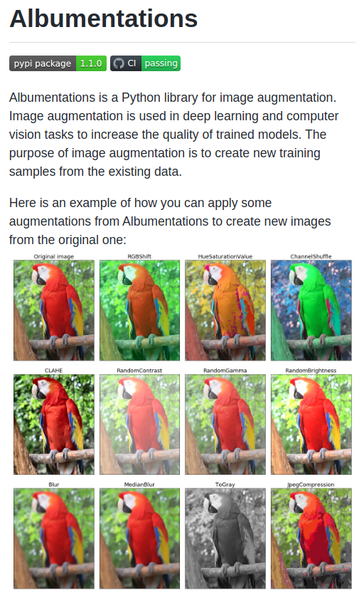
지금까지 텐서플로우에서 기본적으로 제공되는 augmentation 함수들을 확인해 봤습니다. 이러한 augmentation만을 모아서 제공하는 전문 라이브러리들이 있는데요. 이번에는 그중 albumentations 라이브러리를 활용하겠습니다. albumentations은 이미지 증강을 위한 Python 라이브러리입니다. 이미지 증강은 딥 러닝 및 컴퓨터 비전 작업에서 훈련된 모델의 품질을 높이는 데 사용됩니다.

또한 아래 사진 처럼 다양한 작업에서 사용되고 있습니다.
<br>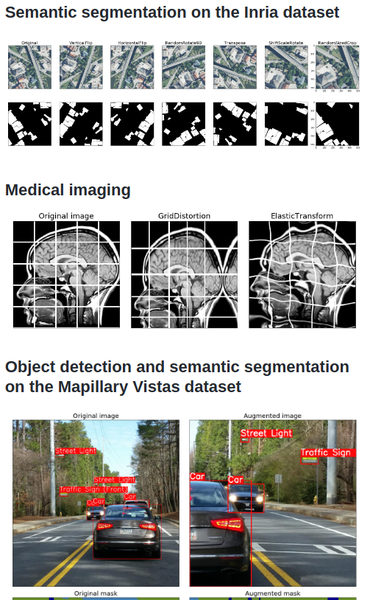

augmentation에서는 배열을 이미지의 기본 형태로 사용합니다. 따라서 PIL Image 데이터형을 넘파이(numpy) 배열로 변환하여 사용하도록 합니다.

In [ ]:
import numpy as np
image = Image.open(sample_img_path).resize((400, 300)) # 이미지에 따라 숫자를 바꾸어 보세요.
image_arr = np.array(image)
image_arr.shape

처음에는 편하게 이미지를 볼수있는 visualize 함수를 만들어 놓겠습니다.

In [ ]:
def visualize(image, i=0):
    plt.subplot(2,5,i+1)
    plt.imshow(image)

print("슝")

### augmentation 기법 사용해 보기
transforms.Affine()
이제 위에서 확인해보지 않았던 augmentation 중 하나를 해봅시다. transforms.Affine()의 Affine()은 아핀 변환(Affine transform)을 이미지에 적용합니다. 2D 변환의 일종인 아핀 변환은 이미지의 스케일(scale)을 조절하거나 평행이동, 또는 회전 등의 변환을 줄 수 있습니다. 자세한 내용은 아래 참고 자료를 확인해 보세요.

In [ ]:
import albumentations as A

plt.figure(figsize=(20, 10))

for i in range(10):
    transform = A.Compose([
        A.Affine(rotate=(-45, 45),scale=(0.5,0.9),p=0.5) 
    ])
    transformed = transform(image=image_arr)
    visualize(transformed['image'], i)

transforms.RandomCrop()
이번에는 RandomCrop()을 사용해서 256x256 정도의 부분을 랜덤하게 짤 10개 정도 생성해 보겠습니다. 자세한 내용은 아래 참고 자료를 확인해 보세요.

In [ ]:
plt.figure(figsize=(20, 10))

for i in range(10):
    transform = A.Compose(
        [A.RandomCrop(width=256, height=256)]
    )
    transformed = transform(image=image_arr)
    visualize(transformed['image'], i)

MedianBlur()
MedianBlur()를 활용하여 블러처리를 쉽게 할수 있습니다.

In [ ]:
plt.figure(figsize=(20, 10))

transform = A.Compose(
    [A.MedianBlur(blur_limit=7, always_apply=False, p=0.5)]
)
transformed = transform(image=image_arr)
visualize(transformed['image'])

ToGray(),MultiplicativeNoise()
이렇게 하나씩 기법을 적용하다 보면 "augmentation 기법들을 한 번에 조합하여 사용할 수는 없을까?" 라는 생각이 듭니다. 아래 코드 처럼 여러 가지의 augmentation 기법을 순차적으로 적용할 수 있습니다. 아래 코드에서는 위에서 사용한 ToGray()와 MultiplicativeNoise() 이 적용된 결과를 볼 수 있습니다.

In [ ]:
plt.figure(figsize=(20, 10))

transform = A.Compose(
    [A.ToGray(p=1),
    A.MultiplicativeNoise(multiplier=[0.5, 1.5], elementwise=True, per_channel=True, p=1)]
)
transformed = transform(image=image_arr)
visualize(transformed['image'])

지금 까지 사용해본 내용을 토대로 그래이 색상의 노이즈가 있는 RandomCrop()을 사용하여 고양이 이미지 100장을 시각화해 보세요!

In [ ]:
# Use various techniques and functions in albumentations library. show 100 images.
# 여기에 코드를 입력해 주세요.
def transform_data(img_arr):
    transform = A.Compose(
        [
          A.ToGray(p=1), # hint : A.ToGray()
          A.MultiplicativeNoise(multiplier=[0.5, 1.5], elementwise=True, per_channel=True, p=1), # hint : A.MultiplicativeNoise()
          A.RandomCrop(width=256, height=256) # 여기에 코드를 입력해 주세요. hint : A.RandomCrop()
        ]
    )
    t_image = transform(image=img_arr)
    t_image = t_image['image']
    return t_image

plt.figure(figsize=(18,20))
for i in range(100):
    image = transform_data(image_arr)
    plt.subplot(10,10,i+1)
    plt.imshow(image)

## 4-9 더 나아간 기법

지금까지 우리가 보아왔던 방식은 딥러닝이 아닌 일정한 수학적 알고리즘을 적용한 augmentation들입니다. 하지만 딥러닝이 발전함에 따라 data augmentation에도 딥러닝을 활용하는 방식이 개발되고 있습니다.
대표적으로 GAN을 Data augmentation에 활용할 수 있습니다. 쉬운 예로는 전통적인 색상 변환 대신 스타일 트랜스퍼(style transfer) 모델을 적용해 볼 수 있겠습니다.
아래 논문에서는 전통적인 augmentation 방법과 GAN을 활용한 augmentation을 적용하여 효과를 실험했습니다. 자세한 내용은 논문을 참고하세요~!

- http://cs231n.stanford.edu/reports/2017/pdfs/300.pdf

<br>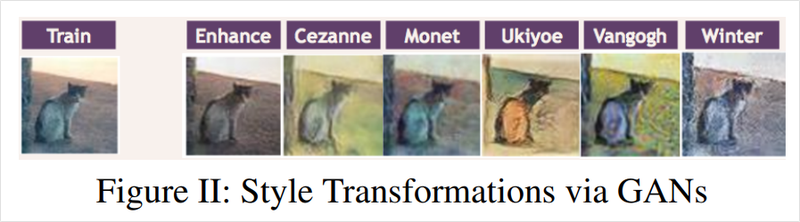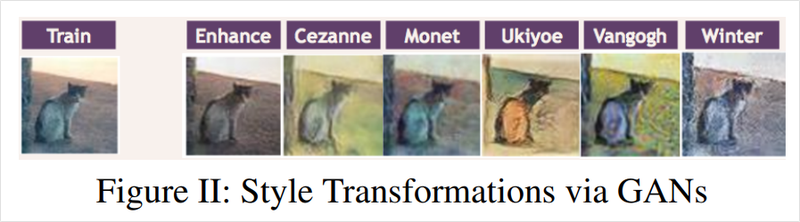

## 4-10 마무리하며

지금까지 여러가지 Data augmentation 기법들을 살펴보았습니다.
Data augmentation은 갖고 있는 데이터셋을 여러 가지 방법으로 증강시켜(augment) 실질적인 학습 데이터셋의 규모를 키울 수 있는 방법으로, 다양한 라이브러리를 통해 사용할 수 있으며, 증강 기법도 여러가지가 있었습니다.
지금부터 여러분들이 얼마나 학습을 충실히 하셨는지 알아보려고 합니다. 배운 내용을 다시 생각하면서 아래의 퀴즈를 풀어보세요.

<br><b>Q. albumentations 라이브러리에 있는 기법 중 학습한 기법을 작성해봅시다.</b>
<br>A)ToGray(): grayscale로 바꾼다.
<br>MultiplicativeNoise(): 곱셈 연산의 노이즈를 추가한다.
<br>transforms.RandomCrop(): 랜덤으로 정해진 크기의 이미지를 추출한다.
<br>transforms.Affine()


학습을 충실히 하셨다면 쉽게 해결하셨을 것이라 생각합니다. 혹시라도 답을 맞추지 못하셨다면 다시 한번 배웠던 내용을 복습해보세요.

지금까지 수고 많이 하셨습니다.